# # Introduction

Water stress is an environmental issue that is increasing in importance as climate change impacts the water cycle. A big component of water stress levels in Canada is water demand driven by the agricultural sector (e.g. water use for irrigation of crops). 

Currently, Statistics Canada collects data on irrigation level on a biennial basis through it's Agricultural Water Survey. Data is available by province for every even years, starting with reference year 2010. As such, there is a data gap for odd years. The queries below will aim to find climate variables that fill that may be useful in estimating irrigation volume in years where no survey data is available.

Datasets we will be using (also available in github directory):

Statistics Canada's Irrigation volume dataset: Contains data on irrigation volume by province and drainage regions
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810023901

Environment Canada Climate Canada Monthly Climate Summaries: Contains weather stations data on various climatic parameters, including monthly averages and extremes of temperature, precipitation amounts, degree days, and sunshine hours.
https://climate.weather.gc.ca/prods_servs/cdn_climate_summary_e.html

Soil Landscapes of Canada: Contains boundary information on Canada's land type, which will be handy to focus our analysis on weather stations on agricultural land

In [113]:
## Importing libaries required for the analysis
import pandas as pd
from pathlib import Path

# Here we're fetching the ECCC monthly climate summaries we saved in our directory.
source_files = sorted(Path('/Users/abdoul-razakmamane/Documents/ECCC_Full/').glob('*.csv'))

# The datasets do not contain a year or month variable, but they're in the files name. We'll import the final names to the datasets and use that later on.
dataframes = []
for file in source_files:
    df = pd.read_csv(file) 
    df['file'] = file.name
    dataframes.append(df)

df_all = pd.concat(dataframes)

In [114]:
# Now that we have a file combining all the datasets, let's add a new column with the month variable:

df_all['Month'] = df_all['file'].str[25:27]
df_all['Month'] = df_all['Month'].astype(int)

# The same line of code targeting different elements of the filename can also be used to isolate the year:

df_all['Year'] = df_all['file'].str[28:32]
df_all['Year'] = df_all['Year'].astype(int)

# We generate a new column combining the Longitude and Latitute of weather stations, that will be referenced later on:

df_all['Location'] = df_all['Long'].astype(str) + ',' + df_all['Lat'].astype(str) 

df_all.to_csv('/Users/abdoul-razakmamane/Documents/Climate Data/all_data.csv')
df_all.head()

,Long,Lat,Stn_Name,Clim_ID,Prov,Tm,DwTm,D,Tx,DwTx,...,Pd,BS,DwBS,BS%,HDD,CDD,file,Month,Year,Location
0,-123.741,48.934,CHEMAINUS,1011500,BC,9.5,0.0,NaN,18.0,0.0,...,4.0,NaN,NaN,NaN,256.1,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.741,48.934"
1,-124.133,48.824,COWICHAN LAKE FORESTRY,1012040,BC,8.3,16.0,-0.2,21.0,16.0,...,9.0,NaN,NaN,NaN,136.3,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-124.133,48.824"
2,-124.052,48.829,LAKE COWICHAN,1012055,BC,8.9,13.0,0.3,31.0,13.0,...,5.0,NaN,NaN,NaN,155.5,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-124.052,48.829"
3,-123.225,48.424,DISCOVERY ISLAND,1012475,BC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en_climate_summaries_All_04-2009.csv,4,2009,"-123.225,48.424"
4,-123.728,48.735,DUNCAN KELVIN CREEK,1012573,BC,8.0,0.0,-1.1,20.5,0.0,...,7.0,NaN,NaN,NaN,300.0,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.728,48.735"


In [115]:
# Importing a list of weather stations located on agricultural land

df_stations = pd.read_excel('/Users/abdoul-razakmamane/Documents/Climate Data/Points_within_AGextent_canada.xls')
df_stations['Location'] = df_stations['Longitude'].astype(str) + ',' + df_stations['Latitude'].astype(str)  
df_stations.head()

#From df_all, we want to isolate weather stations located on agricultural land

df_agriculture = df_all.loc[df_all['Location'].isin(df_stations['Location'])]
df_agriculture.head()


,Long,Lat,Stn_Name,Clim_ID,Prov,Tm,DwTm,D,Tx,DwTx,...,Pd,BS,DwBS,BS%,HDD,CDD,file,Month,Year,Location
3,-123.225,48.424,DISCOVERY ISLAND,1012475,BC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,en_climate_summaries_All_04-2009.csv,4,2009,"-123.225,48.424"
4,-123.728,48.735,DUNCAN KELVIN CREEK,1012573,BC,8.0,0.0,-1.1,20.5,0.0,...,7.0,NaN,NaN,NaN,300.0,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.728,48.735"
5,-123.439,48.432,ESQUIMALT HARBOUR,1012710,BC,8.0,0.0,NaN,19.1,0.0,...,6.0,NaN,NaN,NaN,301.5,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.439,48.432"
6,-123.498,48.872,GANGES MANSELL RD,1013051,BC,8.9,1.0,NaN,20.0,1.0,...,6.0,NaN,NaN,NaN,262.9,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.498,48.872"
8,-123.530,48.575,MALAHAT,1014820,BC,7.8,0.0,NaN,18.0,0.0,...,NaN,NaN,NaN,NaN,305.4,0.0,en_climate_summaries_All_04-2009.csv,4,2009,"-123.53,48.575"


In [116]:
# Bring in irrigation volume data from Statistics Canada

df_irrigation = pd.read_csv('/Users/abdoul-razakmamane/Documents/Climate Data/Irrigation.csv')
df_irrigation['Total Irrigation'] = df_irrigation['Total Irrigation'].astype(int)

df_irrigation.head()

,Prov,Total Irrigation,Year
0,BC,233235,2010
1,BC,234830,2012
2,BC,276888,2014
3,BC,363370,2016
4,BC,744830,2018


In [147]:
# Since Statistics Canada irrigation data is by province, we'll create an average summary table for each variable and province.
df_prov = df_agriculture.groupby(['Prov','Year']).mean()

print(df_prov)


                 Long        Lat         Tm      DwTm         D         Tx  \
Prov Year                                                                    
BC   2009 -121.578009  50.194318  13.608519  2.013580  0.332850  27.637284   
     2010 -121.625612  50.272829  13.042857  1.756912 -0.127251  26.634793   
     2011 -121.683231  50.226402  12.556322  1.531870 -0.546266  24.346290   
     2012 -121.618870  50.254960  13.229505  1.634352  0.091221  26.568809   
     2013 -121.855273  50.314063  13.700887  1.880266  0.639737  27.085730   
...               ...        ...        ...       ...       ...        ...   
SK   2016 -105.806059  51.218333  12.232731  2.239278  0.583511  27.972707   
     2017 -105.909591  51.259977  12.424342  2.315789  0.720619  29.064440   
     2018 -105.970560  51.259394  10.774882  2.194313 -0.718072  29.003963   
     2019 -105.989040  51.220547  10.937381  1.459524 -0.812422  28.527143   
     2020 -106.031988  51.224156  10.865217  1.113527 -0.791613 

In [155]:
# Merge provincial climate datasets with their corresponding irrigation volume in a given year.

df_panel = pd.merge(df_prov, df_irrigation, how='left', on=['Year','Prov'])
del df_panel['Long']
del df_panel['Lat']

# Create datasets for distinct provinces as  

df_panel_sk = df_panel[df_panel['Prov'].str.contains('SK')]
df_panel_sk.to_csv('/Users/abdoul-razakmamane/Documents/Climate Data/df_panel_sk.csv')
df_panel_sk.head()

df_panel_bc = df_panel[df_panel['Prov'].str.contains('BC')]
df_panel_bc.to_csv('/Users/abdoul-razakmamane/Documents/Climate Data/df_panel_bc.csv')
df_panel_bc.head()


,Year,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,DwP,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Month,Total Irrigation
0,2009,BC,13.608519,2.013580,0.332850,27.637284,1.981481,1.532688,1.809927,1.548644,...,2.669746,0.215606,6.733256,257.338095,0.190476,113.294118,146.187531,21.838889,7.011161,NaN
1,2010,BC,13.042857,1.756912,-0.127251,26.634793,1.699309,1.612055,1.408726,0.498157,...,2.546256,0.000000,8.127753,225.533333,0.476190,93.928571,154.909677,13.266935,6.984310,233235.0
2,2011,BC,12.556322,1.531870,-0.546266,24.346290,1.339603,2.100522,1.281087,1.140264,...,2.114573,0.003284,8.229146,216.914286,0.238095,100.562500,167.205538,9.089446,7.008687,NaN
3,2012,BC,13.229505,1.634352,0.091221,26.568809,1.495258,1.719178,1.422550,1.303748,...,2.091000,0.435852,7.649000,229.004762,0.285714,104.176471,153.945732,15.340885,6.989310,234830.0
4,2013,BC,13.700887,1.880266,0.639737,27.085730,1.700221,2.293709,1.619205,0.882334,...,2.211356,0.096654,7.948475,184.766667,7.111111,104.750000,140.594678,17.826053,7.001011,NaN


# Analysis preparation

Now that we have a dataset describing irrigation volume and multiple climate variables by province, we can start a correlation analysis to find variables that are related to irrigation volume.

<AxesSubplot:>

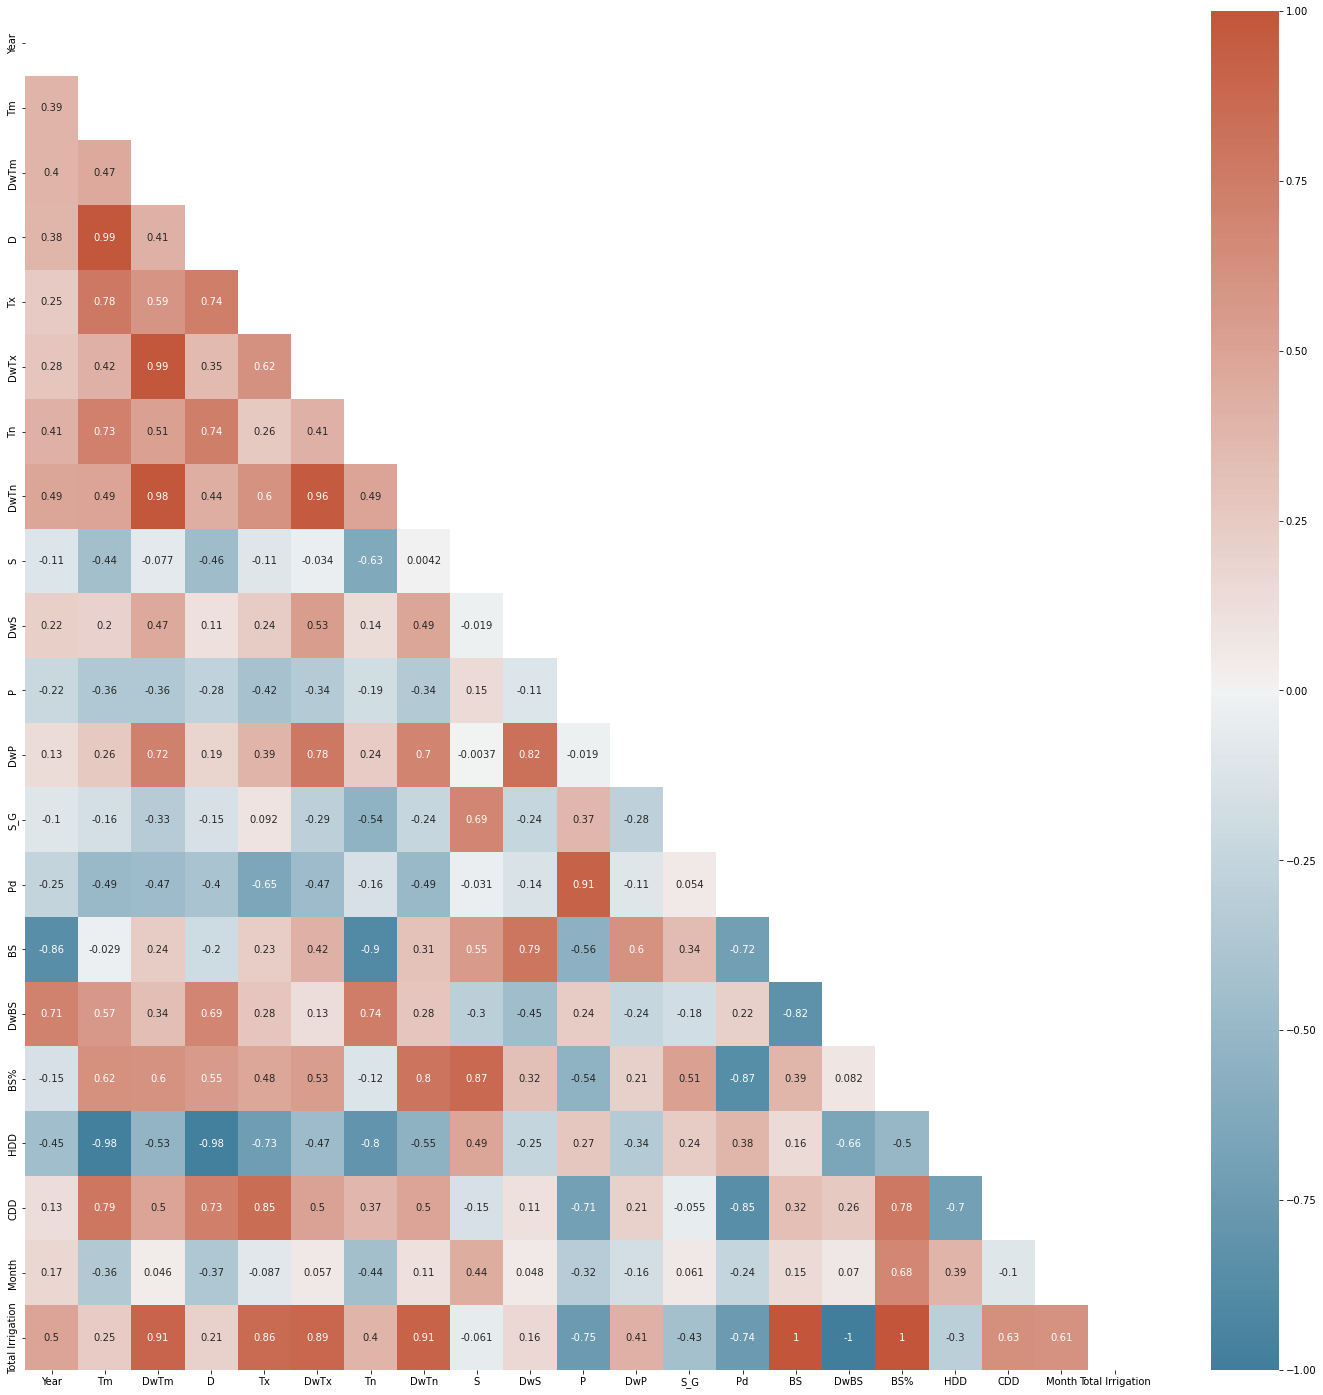

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation between different variables
#
corr = df_panel_bc.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(25, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# # Discussion

Looking at the correlation matrix for British Columbia, we can identify variables that have a positive or negative correlation with irrigation volume. Namely, we can see that Precipitation (P) and Number of days with Precipitation 1.0 mm or more (Pd)  seem to have a strong negative correlation with irrigation volume. Meaning that as these variables go up, Irrigation volumes are going in the opposite direction. This is pretty intuitive as we can hypothesise that the more it rains, the less likely a farmer will need to irrigate his crops. Similarly, temperature and sunshine may contribute to increase the rate of evapotranspiration which could lead to dryer soil.

Meanwhile, most of the variables related to temperatue (Tm) such as Days without Valid Mean Temperature (DwTm) or	Highest Monthly Maximum Temperature (Tx)show a strong positive correlation with irrigation volume (over 0.75). Interestingly enough mean temperature shows a weak correlation with irrigation volume which might indicate that the correlation we've observed for other variables related to temperature may not be a good explanatory variable to explain irrigation volume levels. 

In the next notebook, we'll evaluate how precipitation could be used to model irrigation volumes for years where no survey data is available.


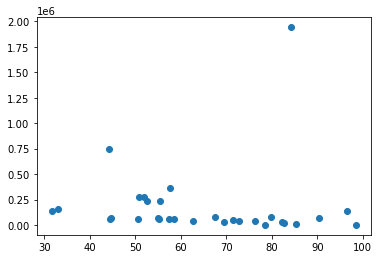

In [120]:
# Linear regression model libraries

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Let's grab the two variables of interest
data = df_panel_f
X = data.iloc[:, 10]
Y = data.iloc[:, 20]
plt.scatter(X, Y)
plt.show()